In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

start = time.perf_counter()

In [33]:
df = pd.read_csv('earl694412-infinite-matchhistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               804 non-null    object 
 1   SeasonNumber       804 non-null    int64  
 2   SeasonVersion      804 non-null    int64  
 3   Player             804 non-null    object 
 4   MatchId            804 non-null    object 
 5   Map                804 non-null    object 
 6   Category           804 non-null    object 
 7   Playlist           804 non-null    object 
 8   Input              804 non-null    object 
 9   Queue              804 non-null    object 
 10  PreCsr             804 non-null    int64  
 11  PostCsr            804 non-null    int64  
 12  Rank               804 non-null    int64  
 13  WasAtStart         804 non-null    int64  
 14  WasAtEnd           804 non-null    int64  
 15  WasInProgressJoin  804 non-null    int64  
 16  Mmr                2 non-n

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df.rename(columns={'TotalKills': 'Kills'}, inplace=True)
df['KillsBody'] = df['Kills'] - df['KillsGrenade'] - df['KillsHeadshot'] - df['KillsMelee'] - df['KillsPower']
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Damage/Kill'] = df['DamageDone'] / df['Kills']
# Per 10 Min
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['Shots/10Min'] = (df['ShotsFired'] / df['LengthMinutes']) * 10
# Excess
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
# Kill Type
df['BodyPct'] = df['KillsBody'] / df['Kills'] *100
df['MeleePct'] = df['KillsMelee'] / df['Kills'] * 100
df['HSPct'] = df['KillsHeadshot'] / df['Kills'] * 100
df['GrenadePct'] = df['KillsGrenade'] / df['Kills'] * 100
df['PowerPct'] = df['KillsPower'] / df['Kills'] * 100



df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr', 'PreCsr', 'PostCsr', 'ShotsFired', 'AssistsEmp',
              'ShotsMissed', 'ShotsLanded', 'Betrayals', 'Suicides', 'WasAtStart', 'WasAtEnd', 'AssistsDriver',
              'Perfects', 'WasInProgressJoin', 'VehicleDestroys', 'VehicleHijacks', 'AssistsCallout',
              'LengthSeconds', 'Rank', 'SeasonNumber', 'SeasonVersion', 'Map'],axis=1)
df = df.drop(['KillsBody','KillsMelee', 'KillsGrenade', 'KillsHeadshot', 'KillsPower'], axis=1)
dfR = df[df['Playlist'] == 'Ranked Arena']
dfRR = dfR[dfR['Date']> '2023-01-01']
dfRR = dfRR[dfRR['Outcome'] != 'Draw']
dfRR = dfRR[dfRR['Outcome'] != 'Left']
dfRR['Outcome'] = dfRR['Outcome'].map({'Win': 1, 'Loss': 0})
dfRR = dfRR.drop(['Date', 'Category', 'Playlist'], axis=1)
dfRR = dfRR.dropna()
dfRR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 140 to 803
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Outcome         552 non-null    int64  
 1   Accuracy        552 non-null    float64
 2   DamageDone      552 non-null    int64  
 3   DamageTaken     552 non-null    int64  
 4   KD              552 non-null    float64
 5   KDA             552 non-null    float64
 6   Kills           552 non-null    int64  
 7   Deaths          552 non-null    int64  
 8   Assists         552 non-null    int64  
 9   MaxSpree        552 non-null    int64  
 10  ExpectedKills   552 non-null    float64
 11  ExpectedDeaths  552 non-null    float64
 12  Score           552 non-null    int64  
 13  Medals          552 non-null    int64  
 14  LengthMinutes   552 non-null    float64
 15  DamageRatio     552 non-null    float64
 16  Damage/Kill     552 non-null    float64
 17  Kills/10Min     552 non-null    f

In [35]:
def cnt(df, col):
    count = df[col].count()
    return count
def sm(df, col):
    sum = df[col].sum()
    return sum
def avg(df, col, val=None):
    avg = round(sm(df, col) / cnt(df, col),val)
    return avg


In [36]:
corr_mtrx = dfRR.corr().abs()
print(corr_mtrx['Outcome'].sort_values(ascending=False))

Outcome           1.000000
Deaths/10Min      0.432607
DmgT/10Min        0.349779
KD                0.318169
Deaths            0.302561
KDA               0.284682
ExcessDeaths      0.255371
DamageTaken       0.229145
ExpectedDeaths    0.191109
Damage/Kill       0.190819
Assists/10Min     0.169970
Kills/10Min       0.156035
MaxSpree          0.126991
DamageRatio       0.123829
LengthMinutes     0.117329
Accuracy          0.080166
DamageDone        0.075420
Assists           0.056625
Score             0.053525
Dmg/10Min         0.042476
Medals            0.040950
BodyPct           0.039112
HSPct             0.027219
Shots/10Min       0.023559
MeleePct          0.015145
ExpectedKills     0.013949
ExcessKills       0.013164
GrenadePct        0.002359
Kills             0.001482
PowerPct          0.001313
Name: Outcome, dtype: float64


In [37]:
# dfRR.hist(bins=15, figsize=(16, 12))
# plt.tight_layout()
# plt.show()

In [38]:
dfRR.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Outcome,552.0,0.539855,0.498861,0.000000,0.000000,1.000000,1.000000,1.000000
Accuracy,552.0,51.574801,5.072691,36.800000,48.410000,51.635000,54.632500,80.560000
DamageDone,552.0,5242.119565,1827.692369,667.000000,3899.500000,4987.500000,6437.250000,12673.000000
DamageTaken,552.0,4451.009058,1520.104631,35.000000,3456.500000,4265.500000,5436.250000,9962.000000
KD,552.0,1.279873,0.763217,0.270000,0.860000,1.130000,1.460000,10.000000
KDA,552.0,4.646558,5.633339,-9.660000,0.660000,4.660000,8.000000,31.000000
Kills,552.0,14.663043,6.348804,1.000000,10.000000,14.000000,18.000000,40.000000
Deaths,552.0,12.818841,5.074380,0.000000,10.000000,12.000000,16.000000,32.000000
Assists,552.0,8.413043,4.170553,1.000000,6.000000,8.000000,11.000000,28.000000
MaxSpree,552.0,3.990942,1.595681,1.000000,3.000000,4.000000,5.000000,10.000000


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
# Define features (X) and target variable (y)
X = dfRR.drop('Outcome', axis=1) 
X = round(X,20)
y = dfRR['Outcome'] 

print(f'X Shape: {X.shape}')
print(f'Y Shape: {y.shape}')

X Shape: (552, 29)
Y Shape: (552,)


In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Shape: {X_test.shape}')
print(X_train.columns)
print(X_test.info())



X Train Shape: (441, 29)
X Test Shape: (111, 29)
Index(['Accuracy', 'DamageDone', 'DamageTaken', 'KD', 'KDA', 'Kills', 'Deaths',
       'Assists', 'MaxSpree', 'ExpectedKills', 'ExpectedDeaths', 'Score',
       'Medals', 'LengthMinutes', 'DamageRatio', 'Damage/Kill', 'Kills/10Min',
       'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min', 'DmgT/10Min',
       'Shots/10Min', 'ExcessKills', 'ExcessDeaths', 'BodyPct', 'MeleePct',
       'HSPct', 'GrenadePct', 'PowerPct'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 553 to 583
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accuracy        111 non-null    float64
 1   DamageDone      111 non-null    int64  
 2   DamageTaken     111 non-null    int64  
 3   KD              111 non-null    float64
 4   KDA             111 non-null    float64
 5   Kills           111 non-null    int64  
 6   Deaths          111 non-null    int64 

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Accuracy', 'DamageDone', 'DamageTaken', 'KD', 'KDA', 'Kills',
                                    'Deaths', 'Assists', 'MaxSpree', 'ExpectedKills', 'ExpectedDeaths',
                                    'Score', 'Medals', 'LengthMinutes', 'DamageRatio', 'Damage/Kill',
                                    'Kills/10Min', 'Deaths/10Min', 'Assists/10Min', 'Dmg/10Min',
                                    'DmgT/10Min', 'Shots/10Min', 'ExcessKills', 'ExcessDeaths',
                                    'BodyPct', 'MeleePct', 'HSPct', 'GrenadePct', 'PowerPct'])])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# X_train_preprocessed.to_csv('X_train_preprocessed.csv')
# X_test_preprocessed.to_csv('X_test_preprocessed.csv')

print(f'X Train Processed Shape: {X_train_preprocessed.shape}')
print(f'X Train Shape: {X_train.shape}')
print(f'X Test Processed Shape: {X_test_preprocessed.shape}')

X Train Processed Shape: (441, 29)
X Train Shape: (441, 29)
X Test Processed Shape: (111, 29)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, log_loss, classification_report, confusion_matrix
MSE_Histmean = mean_squared_error(y_test,np.full(y_test.shape,np.mean(y_train)))

def ResultsOut(model):
  y_pred = model.predict(X_test_preprocessed)
  # Calculate regression metrics
  acc = model.score(X_test_preprocessed, y_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  oosr2 = 1-mean_squared_error(y_test,y_pred)/MSE_Histmean
  ll = log_loss(y_test,y_pred)
  clRep = classification_report(y_test, y_pred)
  confM = confusion_matrix(y_test, y_pred)

  # Print the metrics with newline characters
  print("Acc: {:.3f}".format(acc))
  print("MAE: {:.2f}".format(mae))
  print("MSE: {:.2f}".format(mse))
  print("RMSE: {:.2f}".format(rmse))
  print("R^2 Score: {:.2f}".format(r2))
  print("OOS R^2 Score: {:.2f}".format(oosr2))
  print("Log Loss: {:.2f}".format(ll))
  print('---------------------------------------------------------')
  print(clRep)
  print('---------------------------------------------------------') 
  # print(confM)
  # print('---------------------------------------------------------') 
  return ''

def paramResults(mod):
    results_df = pd.DataFrame({'param': mod.cv_results_["params"], 'Accuracy': mod.cv_results_["mean_test_score"]})

    # Splitting the 'param' column into separate columns
    params_df = pd.DataFrame(results_df['param'].to_list())
    params_df.columns = [f"{col}_param" for col in params_df.columns]

    # Concatenating the new columns with the 'Accuracy' column
    results_df = pd.concat([params_df, results_df['Accuracy']], axis=1)

    # Displaying the updated DataFrame
    print(results_df)
    return ''

def featImport(mod):
    feat_importances = pd.DataFrame(mod.best_estimator_.feature_importances_[:29], index=X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(8,6))
    plt.show()

def coefs(mod):
  # Get the coefficients
  coefficients = mod.coef_[0]

  # Create a dictionary with feature names and their corresponding coefficients
  feature_coefficients = dict(zip(X_train.columns, coefficients))

  # Sort features by coefficients in descending order
  sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

  # Print or analyze the top 5 sorted feature coefficients
  print("Top 5 Sorted Feature Coefficients:")
  for feature, coefficient in sorted_features[:5]:
      print(f"{feature}: {coefficient:.2f}")


## Logistic Regression

In [44]:
# Unregularized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_preprocessed, y_train)

print(f'Unregularized Logistic Regression Accuracy: {logreg.score(X_test_preprocessed, y_test)}')
print(ResultsOut(logreg))
print(coefs(logreg))

Unregularized Logistic Regression Accuracy: 0.7387387387387387
Acc: 0.739
MAE: 0.26
MSE: 0.26
RMSE: 0.51
R^2 Score: -0.05
OOS R^2 Score: -0.04
Log Loss: 9.42
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        54
           1       0.75      0.74      0.74        57

    accuracy                           0.74       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.74      0.74      0.74       111

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
DamageTaken: -4.86
DamageRatio: -4.86
Deaths/10Min: -4.46
KD: 3.11
ExcessDeaths: -3.07
None


## Ridge

In [45]:
# Ridge
# Need to find best params for param grid

C_grid = [10**-3,10**-2,10**-1,10**0,10**1,10**2]

param_grid={'C':C_grid}
ridge_cv = GridSearchCV(LogisticRegression(penalty='l2',solver='saga'),
                                          param_grid=param_grid,cv=5)
ridge_cv.fit(X_train_preprocessed,y_train)

print(ridge_cv.best_estimator_)
print(f'Ridge Accuracy: {ridge_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(ridge_cv))
print(ResultsOut(ridge_cv))
print(coefs(ridge_cv.best_estimator_))


LogisticRegression(C=1, solver='saga')
Ridge Accuracy: 0.7387387387387387
   C_param  Accuracy
0    0.001  0.632559
1    0.010  0.705235
2    0.100  0.780133
3    1.000  0.786798
4   10.000  0.784525
5  100.000  0.784525

Acc: 0.739
MAE: 0.26
MSE: 0.26
RMSE: 0.51
R^2 Score: -0.05
OOS R^2 Score: -0.04
Log Loss: 9.42
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        54
           1       0.73      0.77      0.75        57

    accuracy                           0.74       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.74      0.74      0.74       111

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
Deaths/10Min: -1.94
ExpectedKills: 1.63
ExcessKills: -1.61
ExcessDeaths: -1.59
ExpectedDeaths: -1.57
None


## Lasso

In [46]:
# Lasso

param_grid={'C':C_grid}
lasso_cv = GridSearchCV(LogisticRegression(penalty='l1',solver='saga'),
                                          param_grid=param_grid,cv=5)
lasso_cv.fit(X_train_preprocessed,y_train)

print(lasso_cv.best_estimator_)
print(f'Lasso Accuracy: {lasso_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(lasso_cv))
print(ResultsOut(lasso_cv))
print(coefs(lasso_cv.best_estimator_))

LogisticRegression(C=1, penalty='l1', solver='saga')
Lasso Accuracy: 0.7297297297297297
   C_param  Accuracy
0    0.001  0.546476
1    0.010  0.546476
2    0.100  0.721144
3    1.000  0.789096
4   10.000  0.784525
5  100.000  0.784525

Acc: 0.730
MAE: 0.27
MSE: 0.27
RMSE: 0.52
R^2 Score: -0.08
OOS R^2 Score: -0.08
Log Loss: 9.74
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        54
           1       0.73      0.75      0.74        57

    accuracy                           0.73       111
   macro avg       0.73      0.73      0.73       111
weighted avg       0.73      0.73      0.73       111

---------------------------------------------------------

Top 5 Sorted Feature Coefficients:
Deaths/10Min: -2.11
ExpectedKills: 1.78
ExpectedDeaths: -1.77
ExcessDeaths: -1.59
ExcessKills: -1.54
None


## ElasticNet

In [47]:
# ElasticNet

param_grid2={'C':C_grid,'l1_ratio':[.25, .5, .75]}

elastic_cv = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),
                                            param_grid=param_grid2,cv=5)
elastic_cv.fit(X_train_preprocessed,y_train)

print(elastic_cv.best_estimator_)
print(f'ElasticNet Accuracy: {elastic_cv.score(X_test_preprocessed, y_test)}')
print(paramResults(elastic_cv))
print(ResultsOut(elastic_cv))
print(coefs(elastic_cv.best_estimator_))



LogisticRegression(C=1, l1_ratio=0.75, penalty='elasticnet', solver='saga')
ElasticNet Accuracy: 0.7387387387387387
    C_param  l1_ratio_param  Accuracy
0     0.001            0.25  0.546476
1     0.001            0.50  0.546476
2     0.001            0.75  0.546476
3     0.010            0.25  0.682457
4     0.010            0.50  0.618999
5     0.010            0.75  0.546476
6     0.100            0.25  0.764275
7     0.100            0.50  0.762002
8     0.100            0.75  0.727988
9     1.000            0.25  0.784525
10    1.000            0.50  0.784576
11    1.000            0.75  0.789070
12   10.000            0.25  0.784525
13   10.000            0.50  0.784525
14   10.000            0.75  0.784525
15  100.000            0.25  0.784525
16  100.000            0.50  0.784525
17  100.000            0.75  0.784525

Acc: 0.739
MAE: 0.26
MSE: 0.26
RMSE: 0.51
R^2 Score: -0.05
OOS R^2 Score: -0.04
Log Loss: 9.42
---------------------------------------------------------
        

## K-Nearest Neighbours

In [48]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,50,3))
param_grid = {'n_neighbors': k_values}

knn_cv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knn_cv.fit(X_train_preprocessed,y_train)

print(knn_cv.best_estimator_)
print(f'K-Nearest Neighbors Accuracy: {knn_cv.score(X_test_preprocessed, y_test)}')
knn_cv.cv_results_
print(paramResults(knn_cv))
print(ResultsOut(knn_cv))



KNeighborsClassifier(n_neighbors=13)
K-Nearest Neighbors Accuracy: 0.6486486486486487
    n_neighbors_param  Accuracy
0                   1  0.610138
1                   4  0.639479
2                   7  0.655337
3                  10  0.666752
4                  13  0.678013
5                  16  0.673493
6                  19  0.675817
7                  22  0.675894
8                  25  0.666803
9                  28  0.666879
10                 31  0.664530
11                 34  0.671374
12                 37  0.659985
13                 40  0.659985
14                 43  0.662257
15                 46  0.657763
16                 49  0.671323

Acc: 0.649
MAE: 0.35
MSE: 0.35
RMSE: 0.59
R^2 Score: -0.41
OOS R^2 Score: -0.40
Log Loss: 12.66
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.69      0.65        54
           1       0.67      0.61      0.64        57

    accuracy       

## Random Forest

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [100,300,500],'max_depth': [10, 15, 20]}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=69,max_features='sqrt'),
                                                     cv=5, param_grid=param_grid_rf,n_jobs=-1)
rf_cv.fit(X_train_preprocessed, y_train)

print(rf_cv.best_estimator_)
print(f'Random Forest Accuracy: {rf_cv.score(X_test_preprocessed, y_test)}')
rf_cv.cv_results_
paramResults(rf_cv)

RandomForestClassifier(max_depth=15, random_state=69)
Random Forest Accuracy: 0.6486486486486487
   max_depth_param  n_estimators_param  Accuracy
0               10                 100  0.678115
1               10                 300  0.684857
2               10                 500  0.684883
3               15                 100  0.691701
4               15                 300  0.687104
5               15                 500  0.689428
6               20                 100  0.691701
7               20                 300  0.684857
8               20                 500  0.689428


''

In [50]:
ResultsOut(rf_cv)

Acc: 0.649
MAE: 0.35
MSE: 0.35
RMSE: 0.59
R^2 Score: -0.41
OOS R^2 Score: -0.40
Log Loss: 12.66
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.65      0.64        54
           1       0.66      0.65      0.65        57

    accuracy                           0.65       111
   macro avg       0.65      0.65      0.65       111
weighted avg       0.65      0.65      0.65       111

---------------------------------------------------------


''

<AxesSubplot: >

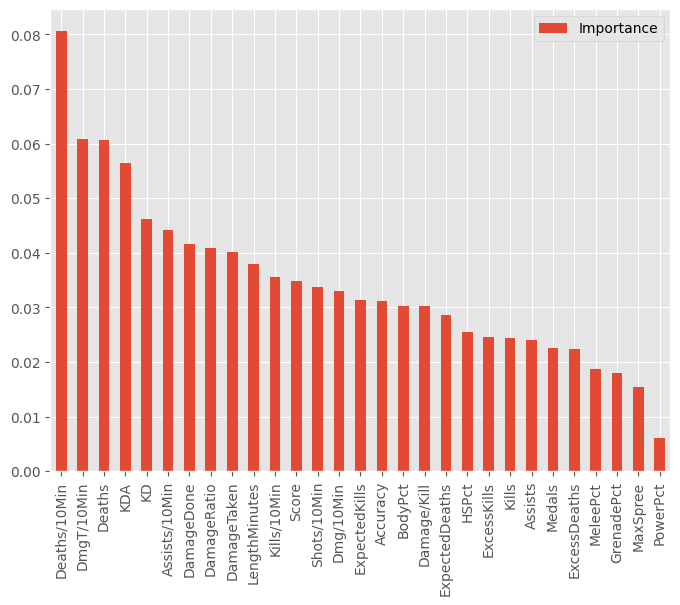

In [51]:
feat_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_[:30], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Gradient Boosted Trees

In [52]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbrt = {'n_estimators': [100,300,500],'learning_rate': [0.01,0.1],'max_depth': [2,4,6], 'subsample': [0.5,0.6,0.8,1]}
GBRT = GridSearchCV(estimator=GradientBoostingClassifier(random_state=69),
                    cv=5, param_grid=param_grid_gbrt,n_jobs=-1)
GBRT.fit(X_train_preprocessed, y_train)

print(GBRT.best_estimator_)
print(f'Gradient Boosed Trees Accuracy: {GBRT.score(X_test_preprocessed, y_test)}')
GBRT.cv_results_
paramResults(GBRT)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300,
                           random_state=69, subsample=0.5)
Gradient Boosed Trees Accuracy: 0.6936936936936937
    learning_rate_param  max_depth_param  n_estimators_param  subsample_param  \
0                  0.01                2                 100              0.5   
1                  0.01                2                 100              0.6   
2                  0.01                2                 100              0.8   
3                  0.01                2                 100              1.0   
4                  0.01                2                 300              0.5   
..                  ...              ...                 ...              ...   
67                 0.10                6                 300              1.0   
68                 0.10                6                 500              0.5   
69                 0.10                6                 500              0.6   
70

''

In [53]:
ResultsOut(GBRT)

Acc: 0.694
MAE: 0.31
MSE: 0.31
RMSE: 0.55
R^2 Score: -0.23
OOS R^2 Score: -0.22
Log Loss: 11.04
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        54
           1       0.69      0.72      0.71        57

    accuracy                           0.69       111
   macro avg       0.69      0.69      0.69       111
weighted avg       0.69      0.69      0.69       111

---------------------------------------------------------


''

<AxesSubplot: >

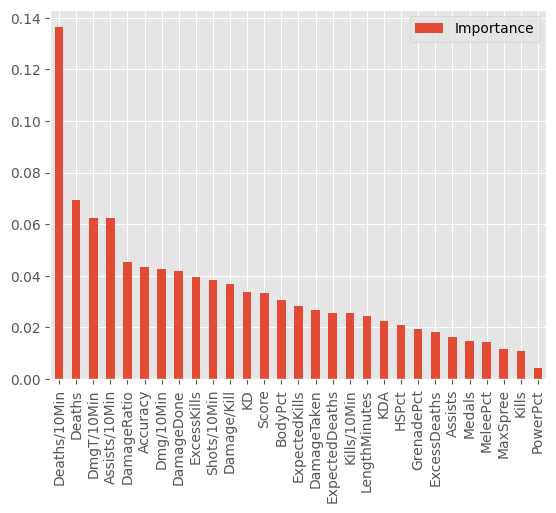

In [54]:
feat_importances = pd.DataFrame(GBRT.best_estimator_.feature_importances_[:30], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

## XGBoost

In [55]:
from xgboost import XGBClassifier

param_grid_xgb = {'n_estimators': [400,450,475,500],'learning_rate': [0.001,0.01,0.1,0.25],'max_depth': [1,2,3,4,5]}
XGB = GridSearchCV(estimator=XGBClassifier(random_state=69), cv=5, param_grid=param_grid_xgb,n_jobs=-1)
XGB.fit(X_train_preprocessed, y_train)

print(XGB.best_estimator_)
print(f'XGBoost Accuracy: {XGB.score(X_test_preprocessed, y_test)}')
paramResults(XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=475, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=69, ...)
XGBoost Accuracy: 0.7207207207207207
    learning_rate_param  max_depth_param  n_estimators_param  Accuracy
0                 0.001                1                 400  0.671118
1                 0.001                1                 450  0.671118
2  

''

In [56]:
ResultsOut(XGB)

Acc: 0.721
MAE: 0.28
MSE: 0.28
RMSE: 0.53
R^2 Score: -0.12
OOS R^2 Score: -0.11
Log Loss: 10.07
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        54
           1       0.73      0.72      0.73        57

    accuracy                           0.72       111
   macro avg       0.72      0.72      0.72       111
weighted avg       0.72      0.72      0.72       111

---------------------------------------------------------


''

<AxesSubplot: >

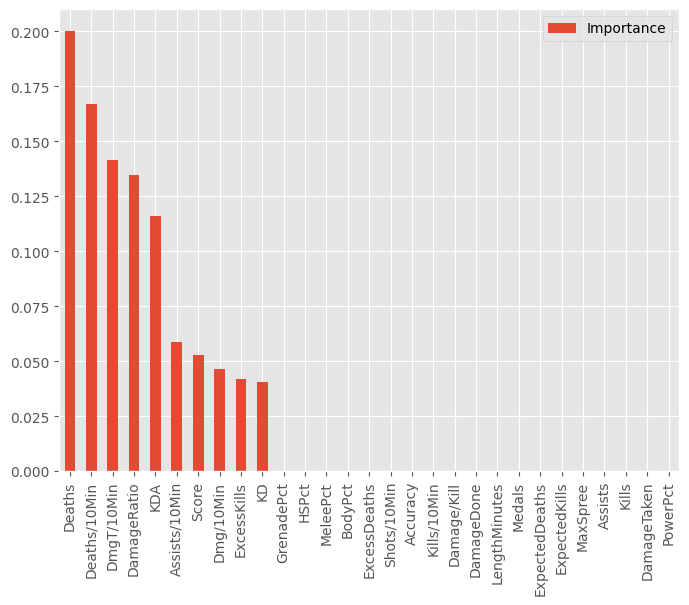

In [57]:
feat_importances = pd.DataFrame(XGB.best_estimator_.feature_importances_[:32], index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Neural Net

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=61), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})
Neural Net Accuracy: 0.7567567567567568


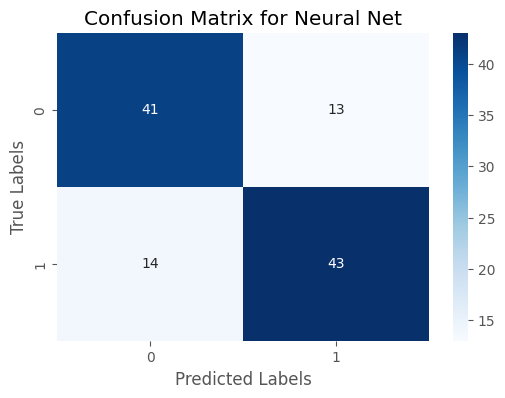

The confusion matrix shows the true positive, false negative, false positive, and true negative values, helping to evaluate the performance of a classification model.


<AxesSubplot: >

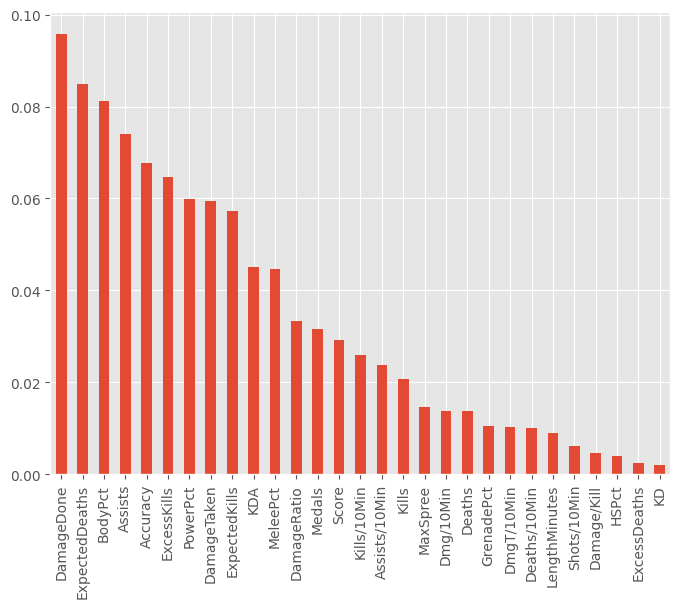

In [58]:
from sklearn.neural_network import MLPClassifier

param_grid_nn = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                'learning_rate': ['constant', 'invscaling', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
nn = GridSearchCV(estimator=MLPClassifier(random_state=61), cv=5, param_grid=param_grid_nn, n_jobs=-1)

nn.fit(X_train_preprocessed, y_train)
print(nn)
print(f'Neural Net Accuracy: {nn.score(X_test_preprocessed, y_test)}')
from sklearn.metrics import confusion_matrix


# Generate confusion matrix for the Neural Net
conf_matrix = confusion_matrix(y_test, nn.predict(X_test_preprocessed))
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Net')
plt.show()

print("The confusion matrix shows the true positive, false negative, false positive, and true negative values, helping to evaluate the performance of a classification model.")
feat_importances_nn = pd.DataFrame(nn.best_estimator_.coefs_[0].flatten()[:29], index=X_train.columns, columns=["Importance"])
feat_importances_nn = feat_importances_nn.abs().sum(axis=1)
feat_importances_nn = feat_importances_nn / feat_importances_nn.sum()
feat_importances_nn = feat_importances_nn.sort_values(ascending=False)[:29]
feat_importances_nn.plot(kind='bar', figsize=(8,6))


,Model,ACC,MAE,MSE,RMSE,R2,OOS R2,Log Loss
0,NeuralNet,0.757,0.243,0.243,0.493,0.026,0.031,8.767
1,Logistic Regression,0.739,0.261,0.261,0.511,-0.046,-0.041,9.417
2,Ridge,0.739,0.261,0.261,0.511,-0.046,-0.041,9.417
3,ElasticNet,0.739,0.261,0.261,0.511,-0.046,-0.041,9.417
4,Lasso,0.730,0.270,0.270,0.520,-0.082,-0.077,9.742
5,XGBoost,0.721,0.279,0.279,0.528,-0.118,-0.113,10.066
6,Gradient Boosted Trees,0.694,0.306,0.306,0.553,-0.226,-0.221,11.040
7,K-Nearest Neighbors,0.649,0.351,0.351,0.593,-0.406,-0.400,12.664
8,Random Forest,0.649,0.351,0.351,0.593,-0.406,-0.400,12.664


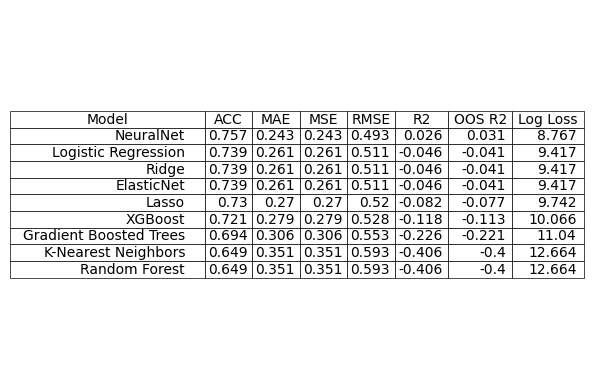

In [59]:
modelss = [logreg,ridge_cv,lasso_cv,elastic_cv,knn_cv,rf_cv,GBRT,XGB,nn]
model_namess = ['Logistic Regression', 'Ridge', 'Lasso', 'ElasticNet',
              'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosted Trees', 'XGBoost', 'NeuralNet']
def saveResults(models, model_names):
    # Initialize an empty dataframe to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'ACC' ,'MAE', 'MSE', 'RMSE', 'R2', 'OOS R2', 'Log Loss'])
    
    # Loop through each model and calculate the metrics
    for i, model in enumerate(models):
        # Generate predictions on the test set
        y_pred = model.predict(X_test_preprocessed)
        
        # Calculate regression metrics
        acc = round(model.score(X_test_preprocessed, y_test),3)
        mae = round(mean_absolute_error(y_test, y_pred),3)
        mse = round(mean_squared_error(y_test, y_pred),3)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),3)
        r2 = round(r2_score(y_test, y_pred),3)
        oosr2 = round(1-mean_squared_error(y_test,y_pred)/MSE_Histmean,3)
        ll = round(log_loss(y_test,y_pred),3)
        
        # Add metrics to the dataframe
        metrics_df.loc[i] = [model_names[i],acc, mae, mse, rmse, r2, oosr2, ll]
    
    metrics_df = metrics_df.sort_values('ACC', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots()
    table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                     cellLoc='right', loc='center')
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(metrics_df.columns))))
    ax.axis('off')
    plt.savefig('ModelResults0210.png', dpi=300, bbox_inches='tight')
    
    return metrics_df

saveResults(modelss,model_namess)


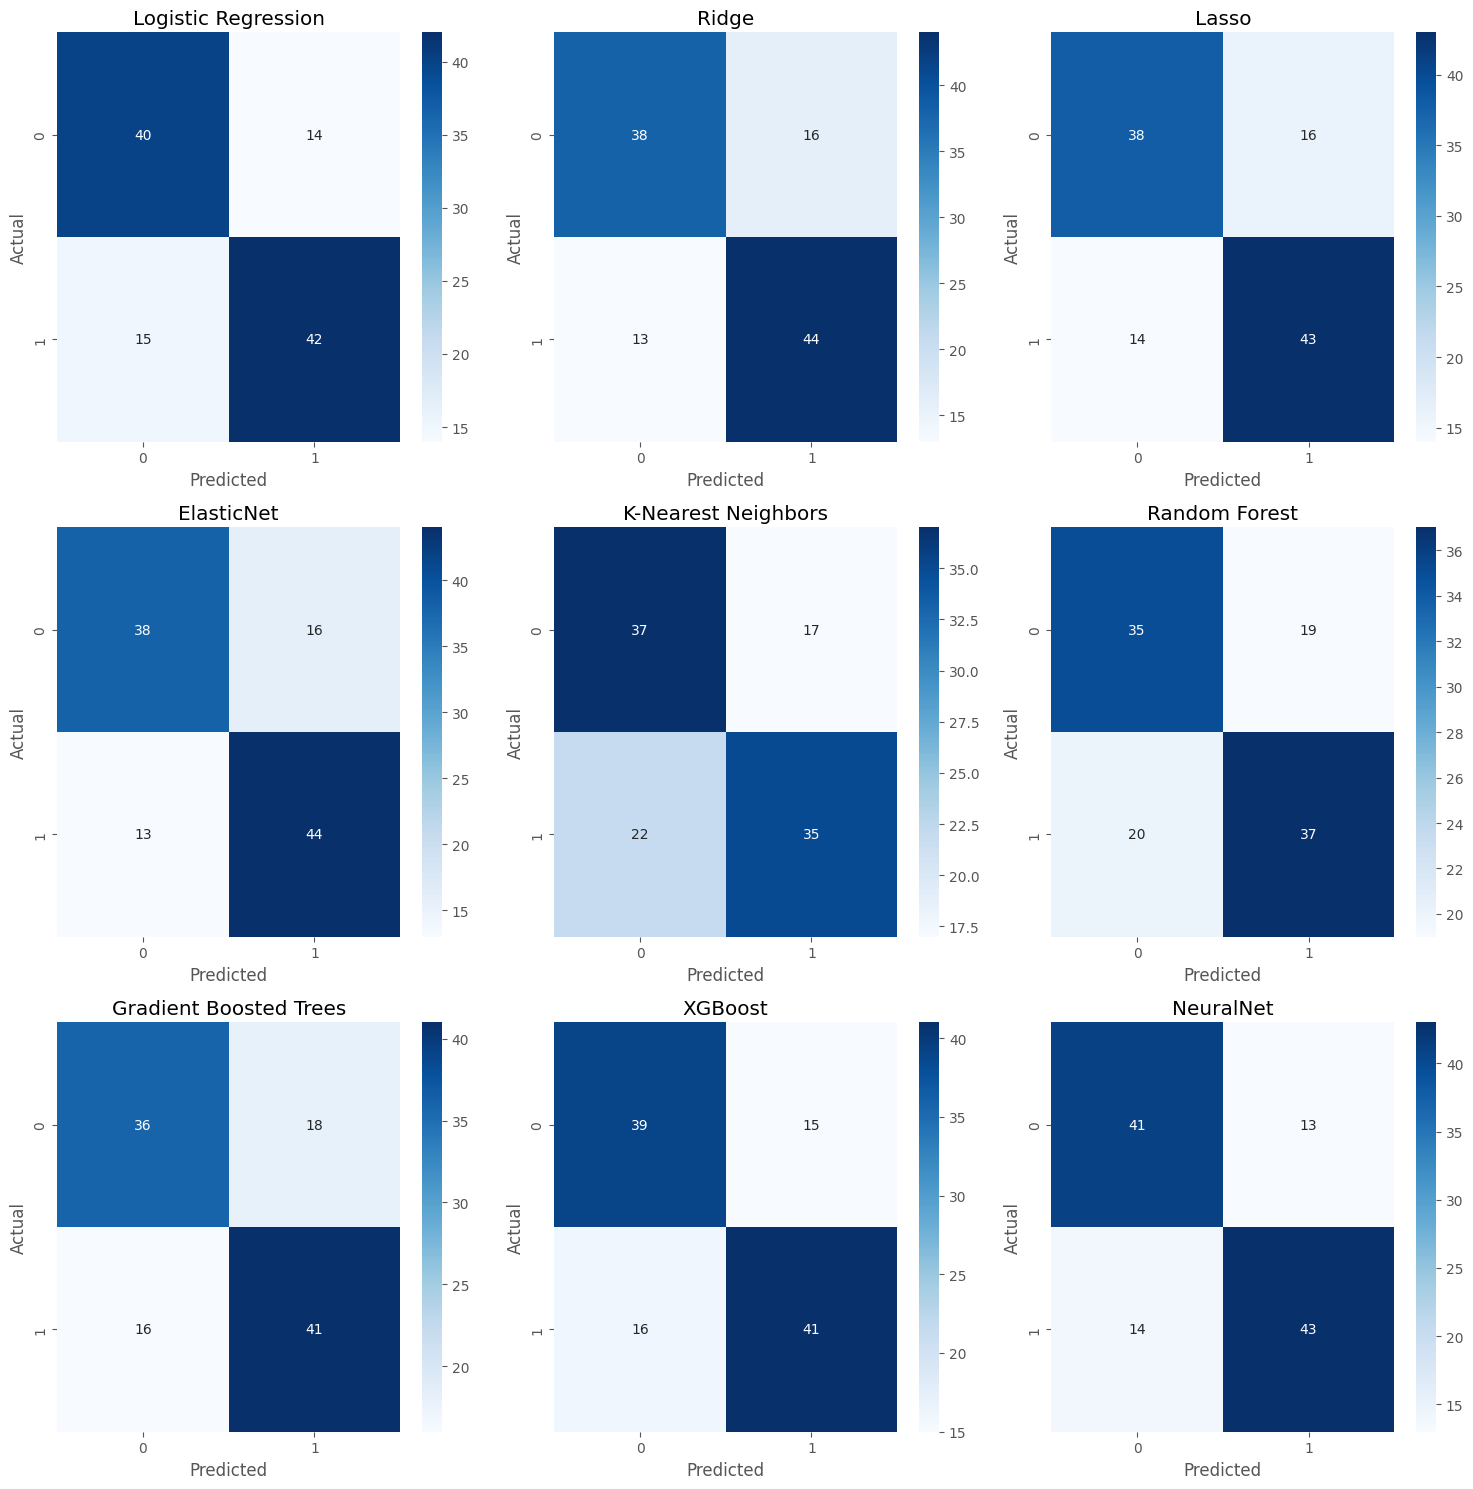

In [60]:
# Assuming X_test_preprocessed and y_test are your test data
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, (model, model_name) in enumerate(zip(modelss, model_namess)):
    y_pred = model.predict(X_test_preprocessed)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(model_name)
    axs[i//3, i%3].set_xlabel('Predicted')
    axs[i//3, i%3].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('Plots/ConfusionMatrixMultigraph.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
print(f'Runtime: {round(time.perf_counter() - start,2)}s')

Runtime: 74.95s


In [62]:
X_trainp_df = pd.DataFrame(X_train_preprocessed, columns=X_train.columns)
round(X_trainp_df.describe().transpose(),3).sort_values(by='max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
KD,441.0,0.0,1.001,-1.266,-0.551,-0.205,0.251,10.736
DamageRatio,441.0,-0.0,1.001,-1.789,-0.667,-0.081,0.478,10.428
Damage/Kill,441.0,-0.0,1.001,-1.884,-0.662,-0.231,0.407,6.500
Shots/10Min,441.0,0.0,1.001,-3.453,-0.578,0.009,0.597,5.966
Accuracy,441.0,-0.0,1.001,-2.891,-0.619,0.035,0.576,5.542
PowerPct,441.0,-0.0,1.001,-0.394,-0.394,-0.394,-0.394,5.277
Score,441.0,0.0,1.001,-2.083,-0.766,-0.124,0.617,4.914
Assists,441.0,0.0,1.001,-1.762,-0.577,-0.104,0.370,4.634
KDA,441.0,0.0,1.001,-2.506,-0.708,-0.011,0.628,4.579
Medals,441.0,0.0,1.001,-1.712,-0.664,-0.140,0.647,4.316
